<a href="https://colab.research.google.com/github/Anomaly42/WiDS_Submission/blob/main/ML_and_DL_PDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1x3gfhI0kX-tckRoQRENF_jTCFLgILCuM

Downloading...
From: https://drive.google.com/uc?id=1x3gfhI0kX-tckRoQRENF_jTCFLgILCuM
To: /content/archive.zip
100% 1.43M/1.43M [00:00<00:00, 135MB/s]


In [2]:
!unzip -n '/content/archive.zip' -d '/content/data'

Archive:  /content/archive.zip
  inflating: /content/data/IPL Ball-by-Ball 2008-2020.csv  
  inflating: /content/data/IPL Matches 2008-2020.csv  


In [3]:
import pandas as pd

In [4]:
matches = df_matches = pd.read_csv("/content/data/IPL Matches 2008-2020.csv")
matches.shape

(816, 17)

In [5]:
deliveries = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
deliveries.shape

(193468, 18)

In [6]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


# Cleaning Up the Data
First, we will implement the same changes we made during EDA:

1.  Fill null values in 'city' columns based on 'venues'
2.  Check unique values in team name’s columns (team1 and team2) and replace two names for the same team with a single name
3.  Drop insignificant columns having very large missing values.
4.  Drop all rows where winner values are missing.
5.  Other Misc. changes

In [8]:
# all null city values are for the venue 'Dubai International Cricket Stadium'
matches.loc[matches['city'].isnull(), 'city'] = 'Dubai'

matches = matches.replace({'Delhi Daredevils' : 'Delhi Capitals','Rising Pune Supergiant' : 'Rising Pune Supergiants'})
deliveries = deliveries.replace({'Delhi Daredevils' : 'Delhi Capitals','Rising Pune Supergiant' : 'Rising Pune Supergiants'})

matches = matches[matches['winner'].notna()]

#convert date columns into pandas datetime format
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = pd.DatetimeIndex(matches['date']).year


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Let's merge the two datasets so that we have the winner of the match and the ball-by-ball data in the same dataframe:

In [9]:
data = pd.merge(left=matches, right=deliveries, on='id', how='right')

# 1.  Regression Task


Creating New, More Suitable Features and our Target, which is the total runs in an inning

In [10]:
data['over'] = data['over']+1

In [11]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,335982Kolkata Knight Riders,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,335982Kolkata Knight Riders,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,335982Kolkata Knight Riders,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,335982Kolkata Knight Riders,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,335982Kolkata Knight Riders,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [12]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
final = pd.merge(left=data2, right=data, on='inning', how='right')

In [13]:
final = final.rename(columns = {'total_runs_x': 'inning_runs'})
final.head()

,inning,inning_runs,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0.0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


We ahall define the following new features before applying correlation analysis

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder= LabelEncoder()
final["team1"]=encoder.fit_transform(final["team1"])
final["team2"]=encoder.fit_transform(final["team2"])
final["winner"]=encoder.fit_transform(final["winner"].astype(str))
final["toss_winner"]=encoder.fit_transform(final["toss_winner"])
final["venue"]=encoder.fit_transform(final["venue"])

In [16]:
final['inning'] = encoder.fit_transform(final['inning'])

In [17]:
final.head()

,inning,inning_runs,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,478,222,335982,Bangalore,2008-04-18,BB McCullum,14,0.0,11,6,11,field,6,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,7,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,478,222,335982,Bangalore,2008-04-18,BB McCullum,14,0.0,11,6,11,field,6,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,7,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,478,222,335982,Bangalore,2008-04-18,BB McCullum,14,0.0,11,6,11,field,6,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,478,222,335982,Bangalore,2008-04-18,BB McCullum,14,0.0,11,6,11,field,6,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,478,222,335982,Bangalore,2008-04-18,BB McCullum,14,0.0,11,6,11,field,6,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008.0,8,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


We will make the following new features:  

1.  runs scored in last 5 overs
2.  wickets taken in last 5 overs

In [18]:
list1 = final['inning'].unique()

temp = final.copy()
last_5_over_balls = 30
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = temp.loc[temp['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','inning_runs']].reset_index(drop=True)
    one_inning['runs_5_overs'] = one_inning['total_runs_y'].rolling(min_periods=1, window=last_5_over_balls).sum()
    one_inning['wickets_5_overs'] = one_inning['is_wicket'].rolling(min_periods=1, window=last_5_over_balls).sum()
    # one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(temp.shape)
print(container.shape)

(193468, 36)
(193468, 10)


In [19]:
container.head()

,over,ball,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,inning_runs,runs_5_overs,wickets_5_overs
0,1,1,0,1,1,0,0,222,1.0,0.0
1,1,2,0,0,0,0,0,222,1.0,0.0
2,1,3,0,1,1,0,0,222,2.0,0.0
3,1,4,0,0,0,0,0,222,2.0,0.0
4,1,5,0,0,0,0,0,222,2.0,0.0


In [20]:
final = container.copy()

In [21]:
final['over_cur'] = final['over'] + final['ball']/10
final = final[['over_cur',
         'batsman_runs','total_runs_y','runs_5_overs','wickets_5_overs','inning_runs']]
final.astype(float)
final = final.fillna(-99.00)
final.isnull().values.any()

False

In [22]:
final

,over_cur,batsman_runs,total_runs_y,runs_5_overs,wickets_5_overs,inning_runs
0,1.1,0,1,1.0,0.0,222
1,1.2,0,0,1.0,0.0,222
2,1.3,0,1,2.0,0.0,222
3,1.4,0,0,2.0,0.0,222
4,1.5,0,0,2.0,0.0,222
...,...,...,...,...,...,...
107,18.6,1,1,42.0,2.0,157
108,19.1,1,1,42.0,2.0,157
109,19.2,1,1,42.0,2.0,157
110,19.3,0,0,41.0,3.0,157


## 1.2 Applying ML Models

In [23]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1

    return (right/l)*100

In [25]:
dataset = final.copy()
print("Size of Dataset:", len(dataset))
X = dataset.iloc[:,[0,2,3,4]].values #Input features
y = dataset.iloc[:, 5].values #Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Size of Dataset: 193468


### 1.2.1. Random Forest Regressor

In [52]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [67]:
%%time
rf_best = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=500,
                                    max_depth = 10,
                                    )
rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_test)
score = rf_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy(y_test,y_pred,20)))

R-squared value: 0.253 
Custom accuracy: 59.800 %
CPU times: user 1min 9s, sys: 1.4 s, total: 1min 11s
Wall time: 1min 12s


In [68]:
import matplotlib.pyplot as plt


[]

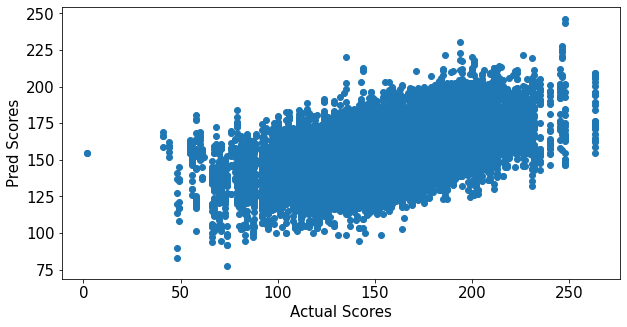

In [69]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

## 1.2.2. GradBoost

In [71]:
%%time
gbr_best = GradientBoostingRegressor(random_state=300,
                                    n_estimators =500,
                                    learning_rate=0.25,
                                    max_depth = 10,
                                    )
gbr_best.fit(X_train,y_train)
y_pred = gbr_best.predict(X_test)
score = gbr_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy(y_test,y_pred,20)))

R-squared value: 0.084 
Custom accuracy: 55.052 %
CPU times: user 2min 13s, sys: 258 ms, total: 2min 14s
Wall time: 2min 23s


[]

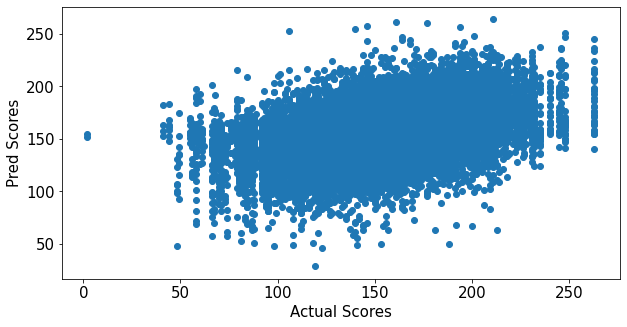

In [72]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

## 1.2.3. Support Vector Regressor

In [73]:
%%time
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy(y_test,y_pred,20)))

R-squared value: 0.241 
Custom accuracy: 59.849 %
CPU times: user 36min 41s, sys: 5.71 s, total: 36min 47s
Wall time: 36min 44s


[]

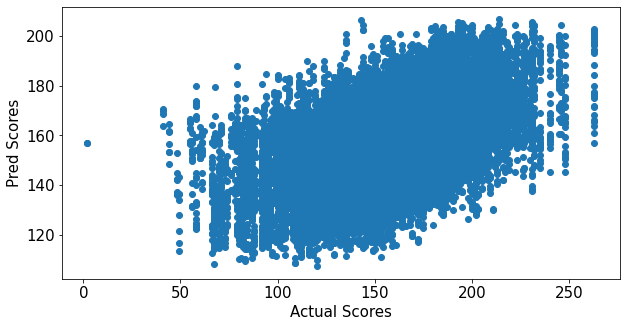

In [74]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

# 2.  Classification Task

We have already preprocessed the matches dataset, so we start with feature engineering


In [28]:
clas_data = matches.copy()

In [29]:
encoder= LabelEncoder()
clas_data["team1"]=encoder.fit_transform(clas_data["team1"])
clas_data["team2"]=encoder.fit_transform(clas_data["team2"])
clas_data["winner"]=encoder.fit_transform(clas_data["winner"].astype(str))
clas_data["toss_winner"]=encoder.fit_transform(clas_data["toss_winner"])
clas_data["venue"]=encoder.fit_transform(clas_data["venue"])

Note that even though it is easy for us to understand how the toss winner and winner are related to the team names in team1 and team2, for an ML algorithm, we need to make this relation more explicit, which we will do by adding features such as team1_win, team1_toss_win and team1_bat  
(source https://towardsdatascience.com/predicting-ipl-match-winner-fc9e89f583ce)

In [32]:
#outcome variable team1_win as a probability of team1 winning the match
clas_data.loc[clas_data["winner"]==clas_data["team1"],"team1_win"]=1
clas_data.loc[clas_data["winner"]!=clas_data["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
clas_data.loc[clas_data["toss_winner"]==clas_data["team1"],"team1_toss_win"]=1
clas_data.loc[clas_data["toss_winner"]!=clas_data["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
clas_data["team1_bat"]=0
clas_data.loc[(clas_data["team1_toss_win"]==1) & (clas_data["toss_decision"]=="bat"),"team1_bat"]=1

In [36]:
prediction_df=clas_data[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.110990,-0.054596,-0.110611,0.169505
team2,-0.110990,1.000000,0.036888,-0.003803,0.013774
team1_toss_win,-0.054596,0.036888,1.000000,0.547838,-0.001612
team1_bat,-0.110611,-0.003803,0.547838,1.000000,0.001885
venue,0.169505,0.013774,-0.001612,0.001885,1.000000


Since there is no feature pair in our correlation matrix that is strongly correlated, we can take select all 5 features for the classification models.

In [48]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [67]:
X, y = prediction_df.drop('team1_win', axis=1), prediction_df['team1_win']


In [68]:
dtree=DecisionTreeClassifier()
svm=SVC()
rfc=RandomForestClassifier(n_estimators=500)

dtree_cvs = cross_val_score(dtree, X, y, cv=5)
svm_cvs = cross_val_score(svm, X, y, cv=5)
rfc_cvs = cross_val_score(rfc, X, y, cv=5)

print('5-Fold Cross Validation Scores of SVM Classifier:')
print(svm_cvs)
print('Average: ' + str(np.mean(svm_cvs)))

print('5-Fold Cross Validation Scores of Decision Tree Classifier:')
print(dtree_cvs)
print('Average: ' + str(np.mean(dtree_cvs)))

print('5-Fold Cross Validation Scores of Random Forest Classifier:')
print(rfc_cvs)
print('Average: ' + str(np.mean(rfc_cvs)))

5-Fold Cross Validation Scores of SVM Classifier:
[0.54601227 0.54601227 0.54320988 0.54938272 0.54938272]
Average: 0.5467999697038552
5-Fold Cross Validation Scores of Decision Tree Classifier:
[0.46625767 0.52760736 0.54320988 0.5        0.52469136]
Average: 0.5123532530485495
5-Fold Cross Validation Scores of Random Forest Classifier:
[0.52760736 0.58895706 0.51234568 0.49382716 0.58024691]
Average: 0.5405968340528668


# 3.  Deep Learning : Neural Networks

In [70]:
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [115]:
temp.head()

,over_cur,batsman_runs,total_runs_y,runs_5_overs,wickets_5_overs,inning_runs
0,1.1,0,1,1.0,0.0,222
1,1.2,0,0,1.0,0.0,222
2,1.3,0,1,2.0,0.0,222
3,1.4,0,0,2.0,0.0,222
4,1.5,0,0,2.0,0.0,222


In [116]:
dataset = final.drop(columns = ['batsman_runs'], axis=1).copy()

In [117]:
dataset.head()

,over_cur,total_runs_y,runs_5_overs,wickets_5_overs,inning_runs
0,1.1,1,1.0,0.0,222
1,1.2,0,1.0,0.0,222
2,1.3,1,2.0,0.0,222
3,1.4,0,2.0,0.0,222
4,1.5,0,2.0,0.0,222


In [118]:
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))

df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()

df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

,over_cur,total_runs_y,runs_5_overs,wickets_5_overs,inning_runs
0,1.1,1.0,1.0,0.0,222.0
1,1.2,0.0,1.0,0.0,222.0
2,1.3,1.0,2.0,0.0,222.0
3,1.4,0.0,2.0,0.0,222.0
4,1.5,0.0,2.0,0.0,222.0


Size of training data : 183795
Size of test data : 9673


In [119]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms = transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)

dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.01
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [120]:
dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [128]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()

        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = self.linear6(x)

        return x.view(batch_size)          

In [129]:
D_in, H1, H2, H3, H4, H5, D_out = 4, 64, 128, 256, 128, 64, 1

In [130]:
model = mymodel(D_in, H1, H2, H3, H4, H5, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=4, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=1, bias=True)
)


In [131]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 84,033 trainable parameters


In [132]:
%%time
step = 0
epochs = 50
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in train_loader:

        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels = inputs, labels        

        model.train()

        outputs = model.forward(inputs)
        predicted = outputs.data
                
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2_score(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())

        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            for input_images2, labels2 in validation_loader:

                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                #print(predicted2,labels2)
                valid_r2_ =  r2_score(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                #val_acc = custom_accuracy(labels2,predicted2)
                valid_loss = criterion(outputs2, labels2)
                # val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/50...  | Train Loss: 0.0084 | Val Loss: 0.0078 | Train R2: -1.8636 | Val R2: -1.4154 | Val Acc: 24.5738 %
Epoch: 2/50...  | Train Loss: 0.0076 | Val Loss: 0.0074 | Train R2: -2.0748 | Val R2: -2.0019 | Val Acc: 25.0472 %
Epoch: 3/50...  | Train Loss: 0.0075 | Val Loss: 0.0074 | Train R2: -2.0992 | Val R2: -2.4226 | Val Acc: 25.3439 %
Epoch: 4/50...  | Train Loss: 0.0074 | Val Loss: 0.0073 | Train R2: -2.0961 | Val R2: -2.6766 | Val Acc: 25.3667 %
Epoch: 5/50...  | Train Loss: 0.0074 | Val Loss: 0.0073 | Train R2: -2.1135 | Val R2: -2.5885 | Val Acc: 25.3667 %
Epoch: 6/50...  | Train Loss: 0.0074 | Val Loss: 0.0073 | Train R2: -2.1228 | Val R2: -1.9191 | Val Acc: 25.4979 %
Epoch: 7/50...  | Train Loss: 0.0073 | Val Loss: 0.0073 | Train R2: -2.1130 | Val R2: -2.0270 | Val Acc: 25.3610 %
Epoch: 8/50...  | Train Loss: 0.0073 | Val Loss: 0.0073 | Train R2: -2.0946 | Val R2: -2.3801 | Val Acc: 25.6804 %
Epoch: 9/50...  | Train Loss: 0.0073 | Val Loss: 0.0073 | Train R2: -2.1234 | Va

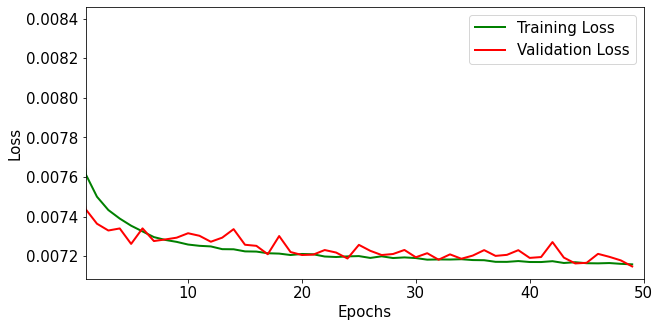

In [137]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,50)
plt.legend()
plt.show()

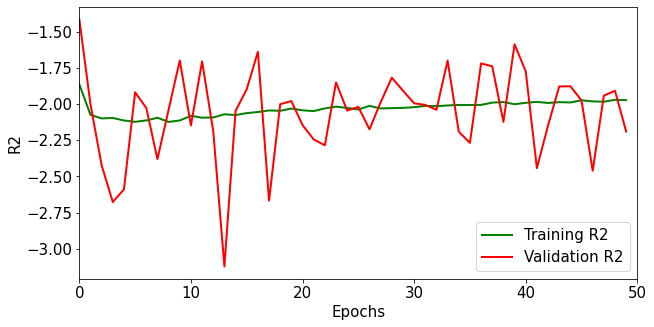

In [138]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))

plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,50)
plt.legend()
plt.show()